# Comparing different methods for the removal of surface reflected light

There are a large variety of methods for removing the specular glint and reflected skylight that can interfere with above water measurements of the upwelling radiance, in this short notebook we simply showcase the methods included in this code. Please feel free to contribute to the project and add more if you have a different preferred method.

This code will take some time to run, and if you're testing the options for the processing of a large dataset we recommend you run this on a subset of your data.

Pull in all the modules needed for this code.

In [2]:
from ipywidgets import FloatProgress, Layout
from IPython.display import display
from micasense import imageset as imageset
from micasense import capture as capture
import multiprocessing
import glob, shutil, os

import cv2
import numpy as np
import matplotlib.pyplot as plt


import micasense.imageutils as imageutils
import micasense.plotutils as plotutils

import exiftool
import datetime

import subprocess
import math

from utils import *
# from georeg import *

import random
import cameratransform as ct
from rasterio.merge import merge

ModuleNotFoundError: No module named 'geopandas'

In [9]:
# this isn't really good practice but there are a few deprecated tools in the Micasense stack so we'll ignore some of these warnings
import warnings
warnings.filterwarnings('ignore')

If you want to just put in your raw Micasense imagery and process it to deglinted, corrected Rrs imagery you can do that with this simple function:

All that you have to do manually is split your data up into this exact structure (name the main_dir whatever you want and put that into the function and keep the rest exactly as named here:
```
    <main_dir>/
        raw_water_imgs/
        align_img/
        raw_sky_imgs/
        panel/
```

With that structure now just specify the path to <main_dir> below:

In [13]:
#project_path = os.path.join('../../../', 'lake_dataset')
# project_path = os.path.join('../../../', 'estuarine_dataset')
project_path = 'gulf_stream_dataset/'

project_path

'gulf_stream_dataset/'

## Comparing all reflected skylight removal options

### Raw -> Lt -> Lw (Black pixel method) -> Rrs (DLS) w/o pixel masking

In [5]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_blackpixel', output_csv_path=project_path, lw_method='blackpixel_method', 
                   mask_pixels=False, ed_method='dls_ed', overwrite=True, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: estuarine_dataset//raw_water_imgs
Loading ImageSet from: estuarine_dataset/align_img
used warp dir estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3
Finished aligning band 2


/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:17.436078
Alignment+Saving rate: 0.92 images per second
Finished saving images.
Finished saving image metadata.
Converting raw sky images to radiance (raw sky -> Lsky).
Loading ImageSet from: estuarine_dataset//raw_sky_imgs
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/clifgray/Code/working/DroneWQ/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:01.890194
Alignment+Saving rate: 1.06 images per second
Finished saving images.
Finished saving image metadata.
Applying the blackpixel_method (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the blackpixel_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

Now visualize the output

### Raw -> Lt -> Lw (Hedley method) -> Rrs (DLS) w/o pixel masking

In [16]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False,ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4
Finished aligning band 2


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.013660
Alignment+Saving rate: 1171.30 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.
Not masking pixels.


True

### Raw -> Lt -> Lw (Hedley method) -> Rrs (panel) 
#### running without overwriting previous data in order to get panel Ed

In [17]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', random_n=15,
                   mask_pixels=False, ed_method='panel_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 3
Finished aligning band 1
Finished aligning band 4


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.017132
Alignment+Saving rate: 933.92 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by panel irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/panel
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by panel_ed irradiance.
Not masking pixels.


True

### Take a look at Rrs images to determine pixel masking

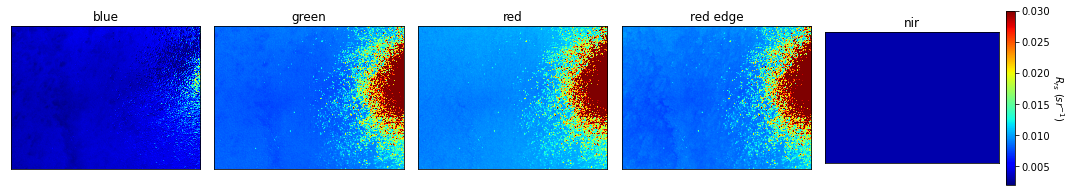

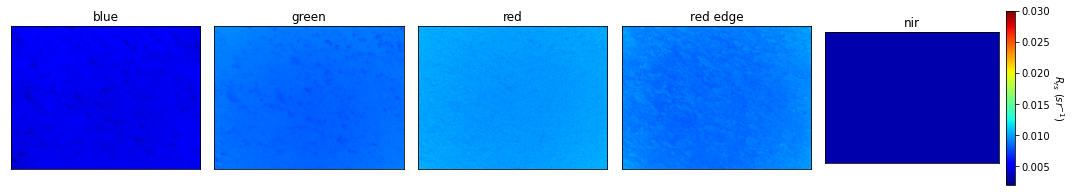

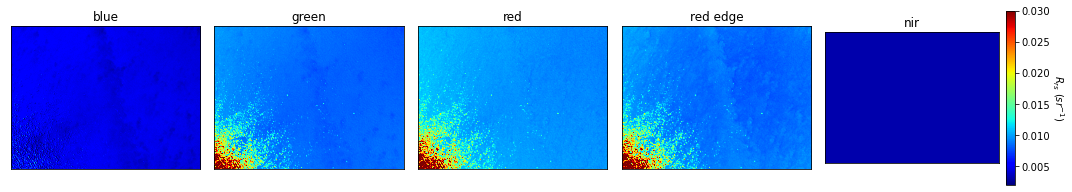

In [20]:
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')

band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### Raw -> Lt -> Lw (Black pixel method) -> Rrs (DLS) w/ pixel masking (using thresholds)

In [25]:
process_raw_to_rrs(main_dir=project_path, rrs_dir_name='rrs_hedley', output_csv_path=project_path, lw_method='hedley_method', 
                   mask_pixels=True, pixel_masking_method='value_threshold', nir_threshold=0.01, green_threshold=0.005,
                   ed_method='dls_ed', overwrite=False, clean_intermediates=False)


Processing a total of 80 captures or 16 image sets.
Converting raw images to radiance (raw -> Lt).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
Loading ImageSet from: ../../../estuarine_dataset/align_img
used warp dir ../../../estuarine_dataset/align_img
Aligning images. Depending on settings this can take from a few seconds to many minutes
Finished aligning band 0
Finished aligning band 2
Finished aligning band 1
Finished aligning band 4
Finished aligning band 3


/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)
/home/jovyan/imageprocessing/Final/FINAL/micasense/imageutils.py:53: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  norm2 = rank.equalize(norm, selem=selem)


Saving time: 0:00:00.019370
Alignment+Saving rate: 826.02 images per second
Finished saving images.
Finished saving image metadata.
Applying the Hochberg/Hedley (Lt -> Lw)
Normalizing by DLS irradiance (Lw/Ed -> Rrs).
Loading ImageSet from: ../../../estuarine_dataset/raw_water_imgs
All data has been saved as Rrs using the hedley_method to calcualte Lw and normalized by dls_ed irradiance.
Masking pixels using NIR and green Rrs thresholds


True

### Read in data

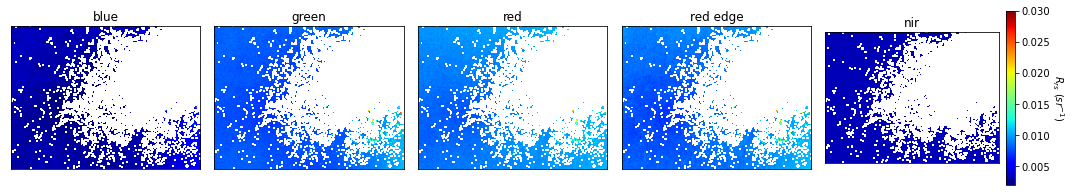

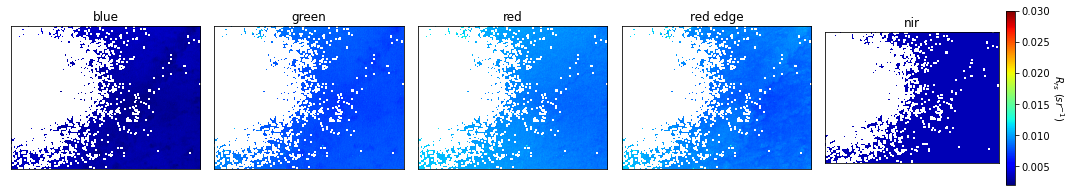

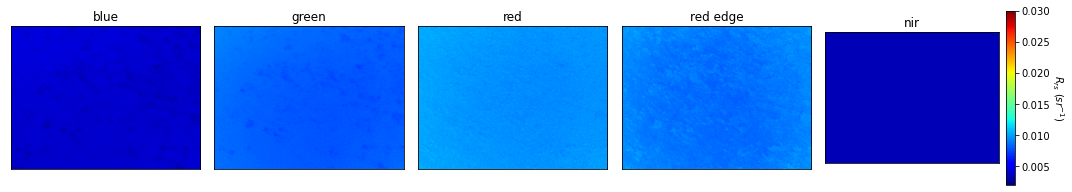

In [26]:
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')

band_names = ['blue', 'green', 'red', 'red edge', 'nir']

for j in random.sample(list(range(len(masked_rrs_imgs_hedley))), 3): #chose random number of images to plot
    fig, ax = plt.subplots(1,5, figsize=(15,4))
    for i in range(5):
        im = ax[i].imshow(masked_rrs_imgs_hedley[j,i],cmap='jet', vmin=0.002, vmax=0.03)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(band_names[i])
    cbar = fig.colorbar(im, ax=ax[4], fraction=0.046, pad=0.04)
    cbar.set_label('$R_{rs}\ (sr^{-1}$)', rotation=270, labelpad=15)
    fig.tight_layout() 

### pull all the data back into memory

In [9]:
lt_imgs, lt_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lt_imgs')
lsky_imgs, lsky_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/sky_lt_imgs', sky=True)

lw_imgs, lw_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/lw_imgs')

dls_ed = pd.read_csv(project_path+'/dls_ed.csv') 
panel_ed = pd.read_csv(project_path+'/panel_ed.csv') 

rrs_imgs_blackpixel, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_blackpixel')
rrs_imgs_mobley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_mobley')
rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/rrs_hedley')
masked_rrs_imgs_hedley, rrs_img_metadata = retrieve_imgs_and_metadata(img_dir = project_path+'/masked_rrs_hedley')

### View all spectra now

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(15,5))

wv = [475, 560, 668, 717, 842]
colors = plt.cm.viridis(np.linspace(0,1,len(lt_imgs)))

#lt
for i in range(len(lt_imgs)):
    ax[0,0].plot(wv, np.nanmean(lt_imgs[i,0:5,:,:],axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,0].set_xlabel('Wavelength (nm)')
    ax[0,0].set_ylabel('$L_t\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')   
ax[0,0].plot(wv, np.nanmean(lt_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#lsky
colors = plt.cm.viridis(np.linspace(0,1,len(lsky_imgs)))

for i in range(len(lsky_imgs)):
    ax[0,1].plot(wv, lsky_imgs[i,0:5,:,:].mean(axis=(1,2))*1000,  marker = 'o', color=colors[i], label="")
    ax[0,1].set_xlabel('Wavelength (nm)')
    ax[0,1].set_ylabel('$L_{sky}\ (mW\ m^2\ sr^{-1}\ nm^{-1}$)')    
ax[0,1].plot(wv, np.nanmean(lsky_imgs[:,0:5,:,:], axis=(0,2,3))*1000,  marker = 'o', color='black', linewidth=5, label='Average')

#dls ed
ed = pd.read_csv(project_path+'/dls_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,2].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,2].set_xlabel('Wavelength (nm)')
    ax[0,2].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,2].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')

#panel ed
ed = pd.read_csv(project_path+'/panel_ed.csv')
colors = plt.cm.viridis(np.linspace(0,1,len(ed)))

for i in range(len(ed)):
    ax[0,3].plot(wv, ed.iloc[i,1:6],  marker = 'o', color=colors[i]) #multiply by 1000 to convert to mW
    ax[0,3].set_xlabel('Wavelength (nm)')
    ax[0,3].set_ylabel('$E_d\ (mW\ m^2\ nm^{-1}$)') 
ax[0,3].plot(wv, ed.iloc[:,1:6].mean(axis=0),  marker = 'o', color='black', linewidth=5, label='Average')


#rrs_imgs_blackpixel
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_blackpixel)))

for i in range(len(rrs_imgs_blackpixel)):
    ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,0].set_xlabel('Wavelength (nm)')
    ax[1,0].set_ylabel('$R_{rs}\ (sr^{-1}$)')   
ax[1,0].plot(wv, np.nanmean(rrs_imgs_blackpixel[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_mobley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_mobley)))

for i in range(len(rrs_imgs_mobley)):
    ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,1].set_xlabel('Wavelength (nm)')
    ax[1,1].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,1].plot(wv, np.nanmean(rrs_imgs_mobley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley
colors = plt.cm.viridis(np.linspace(0,1,len(rrs_imgs_hedley)))

for i in range(len(rrs_imgs_hedley)):
    ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,2].set_xlabel('Wavelength (nm)')
    ax[1,2].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,2].plot(wv, np.nanmean(rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

#rrs_imgs_hedley_masked
colors = plt.cm.viridis(np.linspace(0,1,len(masked_rrs_imgs_hedley)))

for i in range(len(masked_rrs_imgs_hedley)):
    ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[i,0:5,:,:],axis=(1,2)),  marker = 'o', color=colors[i], label="")
    ax[1,3].set_xlabel('Wavelength (nm)')
    ax[1,3].set_ylabel('$R_{rs}\ (sr^{-1}$)') 
    
ax[1,3].plot(wv, np.nanmean(masked_rrs_imgs_hedley[:,0:5,:,:], axis=(0,2,3)),  marker = 'o', color='black', linewidth=5, label='Average')

fig.tight_layout() 